# Exploring the Differences Between a Traditional SSP Framework and a Global Warming Levels Approach

In this notebook, we will explore the different scientific procedures that go behind two major approaches towards understanding regional global warming today:
1. Traditional global warming approach using SSP's (Shared Socioeconomic Pathways)
    - We will reference this approach as the **Traditional SSP Approach** throughout this notebook.
2. New global warming approach using Warming Levels
    - We will reference this approach as the **New GWL Approach** throughout this notebook.

From this notebook, we will understand:
- The different approaches towards understanding global warming levels
- Calculating a metric on both approaches' datasets to see what are the differences

**Intended Application:** As a user, I want to  **<span style="color:#FF0000">understand the differences between a traditional SSP approach and the new Global Warming Levels framework, and use cases where I would consider a Global Warming Levels framework over a traditional SSP approach.</span>**

**Runtime**: With the default settings, this notebook takes approximately **TODO: FILL HERE** to run from start to finish. Modifications to selections may increase the runtime.

## Step 1: Conceptual explanation of GWL

**Insert conceptual explanation of GWL here**

## Step 2: Using AE to load climate data on GWLs

In [1]:
# Cells that are only temporarily needed

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In this notebook, we will use a class called `ClimateData` from `climakitae` to help us retrieve climate data. For more information about how it works, check out **this notebook (TODO: HYPERLINK) here**. The below examples demonstrate basic usage of how to use `ClimateData`.

**This notebook will use warming levels 0.8 and 2.0 to compare a future climate to a historical one.**

In [6]:
from climakitae.new_core.user_interface import ClimateData

In [7]:
cd = ClimateData()

✅ Ready to query! 


Above, we've created a `ClimateData` object called `cd`, which we will use to grab GWL (Global Warming Level approach) data below.

In [8]:
# Here is an example of loading data at 2 specific warming levels (0.8 and 2.0) with a 15-year window for Max Temp.
gwl_data = (cd
    .catalog("cadcat") 
    .activity_id("LOCA2") # Statistical downscaling
    .table_id("mon")      # Looking at `monthly` data
    .grid_label("d03")    # Looking at `45 km` data
    .variable("tasmax")   # Grabbing the maximum temperature variable
    .processes({          # Centering our dataset around GWLs
        "warming_level": {
            "warming_levels": [0.8, 2.0], # Available warming levels include: 0.8, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0
            "warming_level_window": 15, # Default is 15
            # "warming_level_months": [6, 7, 8], # Optional: specify months for seasonal averages, still WIP development
        },
    })
    .get()
)

Found 56 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'tasmax'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


You'll notice how we did not have to specify an SSP to choose here. This is inline with what we discussed about GWLs above, that **one of the benefits of a GWL approach means not needing to choose an SSP scenario**. 

We are also not limited to temperature variables, we can grab any variable via a GWL approach. Below, we'll grab precipitation data using a GWL approach.

In [ ]:
# Here is an example of loading data at 2 specific warming levels (0.8 and 2.0) with a 10-year window for Precipitation.
precip_gwl_data = (cd
    .catalog("cadcat")
    .activity_id("LOCA2") # Statistical downscaling
    .table_id("mon")      # Looking at `monthly` data
    .grid_label("d03")    # Looking at `45 km` data
    .variable("tasmax")   # Grabbing the `precipitation` variable
    .processes({          # Centering our dataset around GWLs
        "warming_level": {
            "warming_levels": [0.8, 2.0], # Available warming levels include: 0.8, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0
            "warming_level_window": 15, # Default is 15
            # "warming_level_months": [6, 7, 8], # Optional: specify months for seasonal averages, still WIP development
        }
    })
    .get()
)

Found 56 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'table_id': 'day', 'grid_label': 'd03', 'variable_id': 'pr'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.


### What does this data look like?

Let's take a look at the objects and some quick visualizations of the data.

In [10]:
# Looking at the `gwl_data` variable
gwl_data

<xarray.Dataset> Size: 212GB
Dimensions:        (sim: 129, warming_level: 2, time_delta: 372, lat: 495,
                    lon: 559)
Coordinates:
  * sim            (sim) object 1kB 'LOCA2_UCSD_MRI-ESM2-0_ssp585_mon_d03_r1i...
  * warming_level  (warming_level) float64 16B 0.8 2.0
  * lat            (lat) float32 2kB 29.58 29.61 29.64 ... 44.95 44.98 45.02
  * lon            (lon) float32 2kB -128.4 -128.4 -128.4 ... -111.0 -111.0
  * time_delta     (time_delta) int64 3kB -186 -185 -184 -183 ... 183 184 185
    simulation     (sim) <U50 26kB 'LOCA2.UCSD.MRI-ESM2-0.ssp585.mon.d03.r1i1...
    centered_year  (sim, warming_level) int64 2kB 2005 2033 2009 ... 2003 2064
Data variables:
    tasmax         (sim, warming_level, time_delta, lat, lon) float64 212GB dask.array<chunksize=(1, 1, 12, 255, 255), meta=np.ndarray>
Attributes: (12/101)
    Conventions:                         CF-1.7 CMIP-6.2
    ID_loca_routines_module:             $Id: loca_routines_module.F90,v 1.13...
    SIOCRD_netCDF_Version:               1.0
    SOURCE_loca_routines_module:         $Source: /home6/dwpierc2/src/mine/lo...
    activity_id:                         CMIP
    bias_correction:                     downscaling via PresRat, Pierce et a...
    ...                                  ...
    resolution:                          3 km
    warming_level:                       {'warming_levels': [0.8, 2.0], 'warm...
    filter_unadjusted_models:            yes
    concat:                              Process 'concat' applied to the data...
    update_attributes:                   Process 'update_attributes' applied ...
    warming_level_simple:                Process 'warming_level_simple' appli...

You'll notice that there are two dimensions and one coordinate that are not common in climate data retrieved using an SSP-approach:
1. `warming_level`: This dimension denotes which warming levels the data is centered around, and in this case, we can see the values as 0.8 and 2.0 -- the same as the WLs we chose above.
2. `time_delta`: This dimension represents the offset in timesteps from the `centered_year` of a given simulation. Since each simulation spans 30 years, we can align and stack them along a common `time_delta` axis. Negative values indicate timesteps before the `centered_year`, while positive values indicate timesteps after it.
3. `centered_year`: The year that a given simulation reaches a certain `warming_level`.

Now, let's take a quick glance at what this data looks like in a couple of figures: **(TODO: This doesn't need to be such complex code, this is just some AI-generated code to make these plots, I can make this cleaner later)**

In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

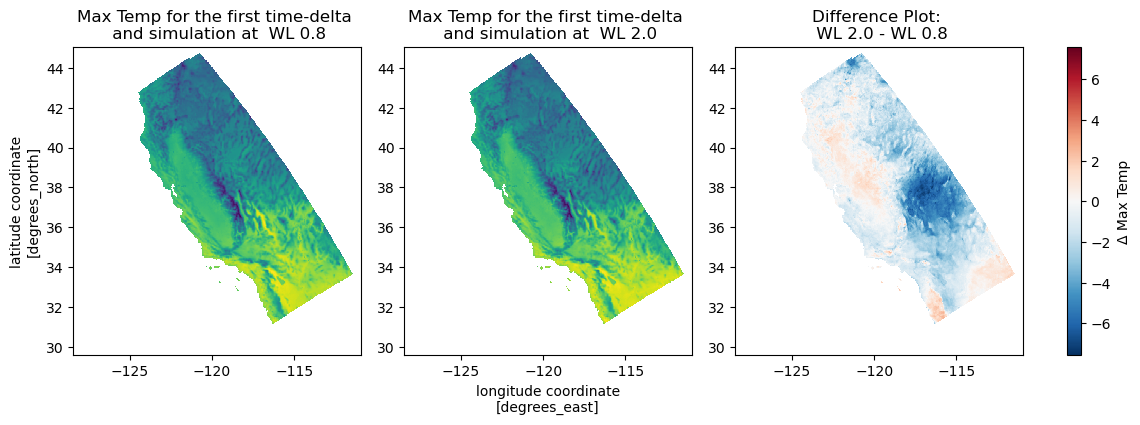

In [45]:
# Plotting the first timestep of GWL max temp data in a side-by-side plot
from climakitae.util.unit_conversions import convert_units
arr = convert_units(gwl_data.tasmax.isel(sim=0, time_delta=0), 'degF')
diff = arr.sel(warming_level=arr.warming_level.values[-1]) - arr.sel(
    warming_level=arr.warming_level.values[0]
)
# Create a grid with an extra column for the colorbar
fig = plt.figure(figsize=(4 * (len(arr.warming_level) + 1) + 1, 4))  # +2 for diff plot and colorbar space
gs = gridspec.GridSpec(1, nplots + 1, width_ratios=[1]*nplots + [0.05], figure=fig)

# Axes for warming levels and diff
axes = [fig.add_subplot(gs[0, i]) for i in range(nplots)]
cax = fig.add_subplot(gs[0, -1])  # colorbar axis

# Plot warming levels
for i, (ax, wl) in enumerate(zip(axes, arr.warming_level.values)):
    arr.sel(warming_level=wl).plot(ax=ax, add_colorbar=False)
    ax.set_title(f"Max Temp for the first time-delta \n and simulation at  WL {wl}")
    if i > 0:
        ax.set_ylabel("")
    if i != 1:
        ax.set_xlabel("")

# Plot difference (no colorbar inside)
pcm = diff.plot(ax=axes[-1], add_colorbar=False)
axes[-1].set_title(
    f"Difference Plot: \n WL {arr.warming_level.values[-1]} - WL {arr.warming_level.values[0]}"
)
axes[-1].set_ylabel("")
axes[-1].set_xlabel("")

# Shared colorbar in reserved axis
fig.colorbar(pcm, cax=cax, label="Δ Max Temp")
plt.show()

## Step 3: Using AE to load climate data for target-year planning

Now that we've seen a GWL approach in action, let's go back to an SSP-approach and grab data that way. 

But in order to do that, we need to know **when** to grab this data. What are `GWL 2.0 and 0.8` in an SSP-approach? Fortunately, we have a tool to answer this very question.

The `get_year_at_gwl` tool translates GWLs to years using IPCC trajectories. **(TODO: FILL IN MORE)**

In [50]:
from climakitae.util.warming_levels import get_year_at_gwl

#### **Grabbing SSP-equivalent data of WL 0.8**

In [51]:
# Let's see what year the world would reach 0.8 degrees celsius of warming above pre-industrial levels at different SSP trajectories
get_year_at_gwl(0.8, 'all')

,5%,Mean,95%
Historical,1990.0,2002.0,2010.0
SSP 1-1.9,2015.0,2015.0,2015.0
SSP 1-2.6,2015.0,2015.0,2015.0
SSP 2-4.5,2015.0,2015.0,2015.0
SSP 3-7.0,2015.0,2015.0,2015.0
SSP 5-8.5,2015.0,2015.0,2015.0


We'll only be looking at the historical row for WL 0.8, as no simulations reach 0.8 degrees of warming before 2015 (when SSP data begins). 

We'll take a 30-year time slice around the year **2002**.

In [55]:
# Here, we'll use the `ClimateData` object again now to retrieve SSP data.
time_data_08 = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")                    # Statistical downscaling
    .table_id("mon")                         # Looking at `monthly` data
    .grid_label("d03")                       # Looking at `45 km` data
    .variable("tasmax")                      # Grabbing the `max temp` variable
    .experiment_id(["historical", "ssp370"]) # Grabbing historical + SSP 3-7.0 data
    .processes({
        "time_slice": ('1987-01-01', '2016-12-31'), # Only selecting data from 1987 to 2017 (a 30-year slice around the year 2002).
    })
    .get()
)

Found 29 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'experiment_id': ['historical', 'ssp370'], 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'tasmax'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


#### **Grabbing SSP-equivalent data of WL 2.0**

In [57]:
# Let's see what year the world would reach 2.0 degrees celsius of warming above pre-industrial levels at different SSP trajectories
get_year_at_gwl(2.0, 'all')

,5%,Mean,95%
Historical,NaN,NaN,NaN
SSP 1-1.9,NaN,NaN,NaN
SSP 1-2.6,NaN,NaN,NaN
SSP 2-4.5,2039.0,2053.0,2081.0
SSP 3-7.0,2037.0,2047.0,2061.0
SSP 5-8.5,2034.0,2042.0,2054.0


Let's use SSP 3-7.0 for comparison, and take a 30-year time slice of data around the year **2047** (based on the table above).

In [59]:
# Here, we'll use the `ClimateData` object again now to retrieve SSP data.
time_data_20 = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")                    # Statistical downscaling
    .table_id("mon")                         # Looking at `monthly` data
    .grid_label("d03")                       # Looking at `45 km` data
    .variable("tasmax")                      # Grabbing the `max temp` variable
    .experiment_id(["historical", "ssp370"]) # Grabbing historical + SSP 3-7.0 data
    .processes({
        "time_slice": ('2033-01-01', '2062-12-31'), # Only selecting data from 2033 to 2062 (a 30-year slice around the year 2047).
    })
    .get()
)

Found 29 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'experiment_id': ['historical', 'ssp370'], 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'tasmax'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


## Step 4: Do some analysis on the data we loaded

We will conduct a comparison of the two datasets by analyzing future climate projections against historical baselines. Specifically, we will calculate the difference in **average in yearly maximum air temperature between a 2.0°C and 0.8°C warming world**, and evaluate how these changes align with their time-based components.

In [127]:
from climakitae.core.data_load import load
from climakitae.util.utils import add_dummy_time_to_wl
from climakitae.util.unit_conversions import convert_units

For this analysis, we'll clip the data to an area of interest. We've just a gridcell in Ventura County for this example. **(TODO: This can change to a shapefile or some other shape or area)**

In [60]:
# We're going to clip our data to the gridcell of interest
lat = 34.379151
lon = -119.194058

gwl_data_onecell = gwl_data.sel(lat=lat, lon=lon, method='nearest')
time_data_08_onecell = time_data_08.sel(lat=lat, lon=lon, method='nearest')
time_data_20_onecell = time_data_20.sel(lat=lat, lon=lon, method='nearest')

Now that our data is clipped, let's analyze both our GWL data and our SSP data.

### GWL-approach analysis

In [128]:
# Calculating the `Average Yearly Max Air Temperature` for a GWL 0.8 and 2.0.
loca_gwl_data = add_dummy_time_to_wl(gwl_data_onecell.tasmax, freq_name="monthly")
loca_gwl_maxx = loca_gwl_data.groupby('time.year').max()
loca_gwl_maxx = load(loca_gwl_maxx, progress_bar=True)

# Converting units to degF
loca_gwl = convert_units(loca_gwl_maxx, 'degF')

Processing data to read 62.48 KB of data into memory... 
[########################################] | 100% Completed | 131.56 s
Complete!


In [129]:
# Taking the delta between GWLs
gwl_delta = loca_gwl.sel(warming_level=2.0).mean(dim='year') - loca_gwl.sel(warming_level=0.8).mean(dim='year')

### Time-based approach analysis

In [131]:
# Calculating the `Average Yearly Max Air Temperature` for the time-periods corresponding to GWL 0.8 and 2.0.
loca_time_das = []
for time_data in [time_data_08_onecell, time_data_20_onecell]:
    loca_time_maxx = time_data.tasmax.groupby('time.year').max()
    loca_time_maxx = load(loca_time_maxx, progress_bar=True)

    # Converting units to degF
    loca_time = convert_units(loca_time_maxx, 'degF')
    loca_time_das.append(loca_time)

Processing data to read 7.85 KB of data into memory... 
[########################################] | 100% Completed | 30.01 s
Complete!
Processing data to read 7.27 KB of data into memory... 
[########################################] | 100% Completed | 16.57 s
Complete!


In [132]:
# Taking the delta between the two time periods
time_delta = loca_time_das[1].mean(dim='year') - loca_time_das[0].mean(dim='year')

## Step 5: Illustrating differences between GWL and target-year planning

In [136]:
import numpy as np
import matplotlib.pyplot as plt

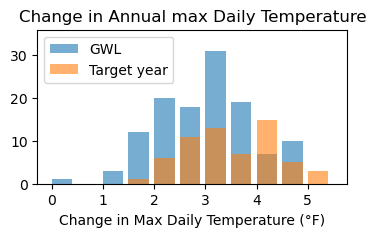

In [137]:
plt.figure(figsize=(4,2))

gwl_delta.plot.hist(width=0.4, bins = np.arange(0, 6, 0.5), alpha=0.6, label='GWL')
plt.ylim(0,36)
plt.xlabel('Change in Max Daily Temperature (°F)')

time_delta.plot.hist(width=0.4, bins = np.arange(0, 6, 0.5), alpha=0.6, label='Target year')
plt.title('Change in Annual max Daily Temperature')
plt.ylim(0,36)
plt.xlabel('Change in Max Daily Temperature (°F)')

plt.legend()

### Conducting t-tests

In [139]:
from scipy.stats import ttest_1samp

In [155]:
gwl_ttest = ttest_1samp(gwl_delta.where(~gwl_delta.isnull(), drop=True), 0)
gwl_ttest

TtestResult(statistic=np.float64(36.23863394781701), pvalue=np.float64(8.154253646769174e-67), df=np.int64(121))

In [157]:
gwl_ttest.confidence_interval()

ConfidenceInterval(low=np.float64(2.909618301538632), high=np.float64(3.245902413937108))

In [156]:
time_ttest = ttest_1samp(time_delta, 0)
time_ttest

TtestResult(statistic=np.float64(30.612673001203326), pvalue=np.float64(9.954469831400162e-39), df=np.int64(61))

In [158]:
time_ttest.confidence_interval()

ConfidenceInterval(low=np.float64(3.356238070218416), high=np.float64(3.8253396122767014))